In [3]:
#Data Set Column Descriptions
#pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#survived: Survival (0 = No; 1 = Yes)
#name: Name
#sex: Sex
#age: Age
#sibsp: Number of siblings/spouses aboard
#parch: Number of parents/children aboard
#ticket : ticket no
#embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

titan_df = pd.read_excel('titanic.xls')
print(titan_df.head())

   pclass  survived                                             name     sex      age  sibsp  parch  ticket embarked
0       1         1                    Allen, Miss. Elisabeth Walton  female  29.0000      0      0   24160        S
1       1         1                   Allison, Master. Hudson Trevor    male   0.9167      1      2  113781        S
2       1         0                     Allison, Miss. Helen Loraine  female   2.0000      1      2  113781        S
3       1         0             Allison, Mr. Hudson Joshua Creighton    male  30.0000      1      2  113781        S
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000      1      2  113781        S


In [1]:
s = titan_df['sex'].value_counts()
print('No. of Total passengers gender wise :')
print(s)


NameError: name 'titan_df' is not defined

In [6]:
# Data Wrangling
print('Titan DF status to find missing values:')
print(titan_df.isnull().sum())
print('Titan DF info output')
print(titan_df.info())
print('Deleting Missing Data')
titan_df = titan_df.dropna(axis = 0, how ='any')
print('Titan DF info output after deleting missing data')
print(titan_df.isnull().sum())
print(titan_df.info())


Titan DF status to find missing values:
pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
embarked      2
dtype: int64
Titan DF info output
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   embarked  1307 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 92.2+ KB
None
Deleting Missing Data
Titan DF info output after deleting missing data
pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket    

In [7]:
s = titan_df["survived"].value_counts()       # 's' becomes a Pandas Series object
print('Not Survived of Total passengers:', s[0])
print('Survived of Total passengers:', s[1])


Not Survived of Total passengers: 619
Survived of Total passengers: 425


In [8]:
s= titan_df['survived'].value_counts(normalize = True)
print(s[0], s[1])
print('Percentage of Total Non Survival : %.2f' % (s[0] * 100))
print('Percentage of Total Survival : %.2f'  % (s[1] * 100))            


0.592911877394636 0.407088122605364
Percentage of Total Non Survival : 59.29
Percentage of Total Survival : 40.71


In [9]:
# Number of males survived vs. not-survived
s = titan_df['survived'][titan_df['sex'] == 'male'].value_counts()
print('Total males not survived :', s[0])
print('Total males survived :', s[1])
s = titan_df['survived'][titan_df['sex'] == 'male'].value_counts(normalize = True)
print(s)
print('Percentage of males not survived : %.2f' % (s[0]*100))
print('Percentage of males survived : %.2f' % (s[1]*100))


Total males not survived : 523
Total males survived : 135
0    0.794833
1    0.205167
Name: survived, dtype: float64
Percentage of males not survived : 79.48
Percentage of males survived : 20.52


In [10]:
# Number of females survived vs. not-survived
s = titan_df['survived'][titan_df['sex'] == 'female'].value_counts()
print('Total females not survived :', s[0])
print('Total females survived :', s[1])
s = titan_df['survived'][titan_df['sex'] == 'female'].value_counts(normalize = True)
print(s)
print('Percentage of females not survived : %.2f' % (s[0]*100))
print('Percentage of females survived : %.2f' % (s[1]*100))



Total females not survived : 96
Total females survived : 290
1    0.751295
0    0.248705
Name: survived, dtype: float64
Percentage of females not survived : 24.87
Percentage of females survived : 75.13


In [11]:
# Create a feature called 'child'
# since it's probable that children were saved first.
# We test by creating a new column with a
# categorical variable called 'child'.
# child = 1 for age < 18 and child = 0 when age >= 18

In [12]:
titan_df["child"] = float('NaN')
titan_df['child'][titan_df['age'] < 18] = 1
titan_df['child'][titan_df['age'] >= 18] = 0

# Print normalized Survival Rates for passengers under 18
s = titan_df["survived"][titan_df["child"] == 1].value_counts(normalize = True)
print(s)
print('Percentage Not Survived under age 18 : %.2f' % (s[0] * 100))
print('Percentage Survived under age 18 : %.2f' % (s[1] * 100))

1    0.525974
0    0.474026
Name: survived, dtype: float64
Percentage Not Survived under age 18 : 47.40
Percentage Survived under age 18 : 52.60


In [13]:
# Print normalized Survival Rates for passengers 18 or older (>= 18)
s = titan_df["survived"][titan_df["child"] == 0].value_counts(normalize = True)
print(s)
print('Percentage Not Survived for age >= 18 : %.2f' % (s[0] * 100))
print('Percentage Survived for age >= 18 : %.2f' % (s[1] * 100))



0    0.613483
1    0.386517
Name: survived, dtype: float64
Percentage Not Survived for age >= 18 : 61.35
Percentage Survived for age >= 18 : 38.65


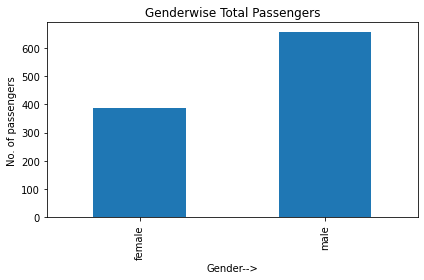

In [17]:
# Now data visualization using matplotlib
#---------------------------------------
# Breakup of total passengers genderwise
titan_df.groupby(['sex']).size().plot(kind='bar')   
plt.title('Genderwise Total Passengers')
plt.ylabel('No. of passengers')
plt.xlabel('Gender-->')
plt.tight_layout()
plt.show()


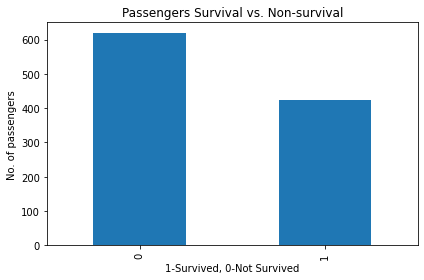

In [18]:
# Breakup of passengers survival vs. non-survival 
titan_df.groupby(['survived']).size().plot(kind='bar')
plt.title('Passengers Survival vs. Non-survival')
plt.ylabel('No. of passengers')
plt.xlabel('1-Survived, 0-Not Survived')
plt.tight_layout()
plt.show()


Class wise no.of passengers
3    501
1    282
2    261
Name: pclass, dtype: int64


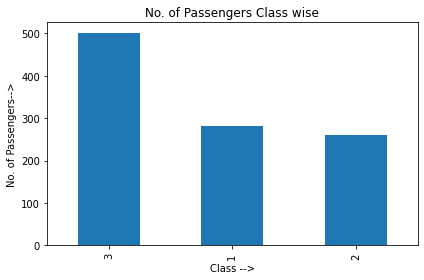

In [19]:

# No. of passengers Class wise 
print('Class wise no.of passengers')
print(titan_df['pclass'].value_counts())
titan_df['pclass'].value_counts().plot(kind='bar')
plt.title('No. of Passengers Class wise')
plt.xlabel('Class -->')
plt.ylabel('No. of Passengers-->')
plt.tight_layout()
plt.show()

No. of passengers class wise, gender wise
pclass  sex   
1       female    131
        male      151
2       female    103
        male      158
3       female    152
        male      349
dtype: int64


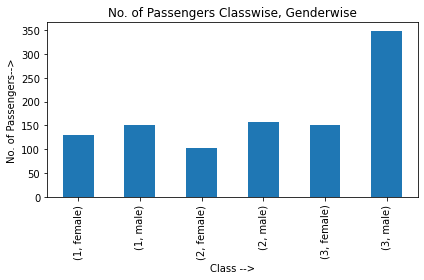

In [20]:
# No of passengers class wise, genderwise
print('No. of passengers class wise, gender wise')
print(titan_df.groupby(['pclass', 'sex']).size())

titan_df.groupby(['pclass', 'sex']).size().plot(kind='bar')    #, stacked=True)
plt.title('No. of Passengers Classwise, Genderwise')
plt.xlabel('Class -->')
plt.ylabel('No. of Passengers-->')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='pclass'>

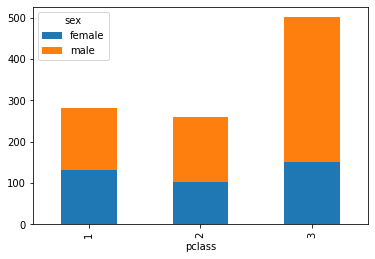

In [24]:
titan_df.groupby(['pclass', 'sex']).size().unstack().plot(kind='bar', stacked=True)

Class wise Survival vs. Non-Survival
pclass  survived
1       0           103
        1           179
2       0           146
        1           115
3       0           370
        1           131
dtype: int64


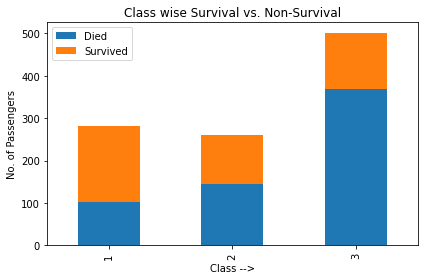

In [25]:
# Class wise survival vs. non-survival
print('Class wise Survival vs. Non-Survival')
print(titan_df.groupby(['pclass', 'survived']).size())
titan_df.groupby(['pclass', 'survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Class wise Survival vs. Non-Survival')
plt.xlabel('Class -->')
plt.ylabel('No. of Passengers')
plt.legend(['Died', 'Survived'])
plt.tight_layout()
plt.show()


Class wise Survival vs. Non Survival of 
child passengers(age<18)
pclass  survived
1       0            2
        1           13
2       0            4
        1           29
3       0           67
        1           39
dtype: int64


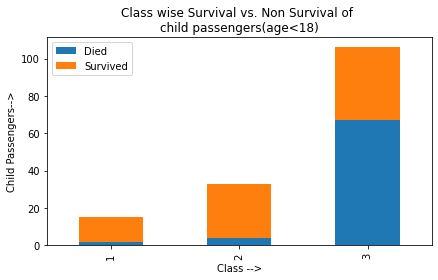

In [26]:
# Class wise Survival vs. Non-survival of child passengers( age < 18)
print('Class wise Survival vs. Non Survival of \nchild passengers(age<18)') 
print(titan_df[titan_df.child==1].groupby(['pclass', 'survived']).size())
titan_df[titan_df.child==1].groupby(['pclass','survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Class wise Survival vs. Non Survival of \nchild passengers(age<18)')
plt.tight_layout()
plt.legend(['Died','Survived'])
plt.xlabel('Class -->')
plt.ylabel('Child Passengers-->')
plt.show()

